In [1]:
# Allow the PyMC3 models to be imported in the notebook folder

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from pymc3 import summary, traceplot
import pymc3 as pm

%matplotlib inline

In [7]:
from pymc3_models.models.LinearRegression import LinearRegression

In [3]:
plt.rcParams['figure.figsize'] = (15, 10)

plt.rcParams['font.size'] = 16

Generate Synthetic Data
===

In [4]:
X = np.random.randn(1000, 1)
noise = 2 * np.random.randn(1000, 1)
Y = 4 * X + 3 + noise

In [5]:
Y = np.squeeze(Y)

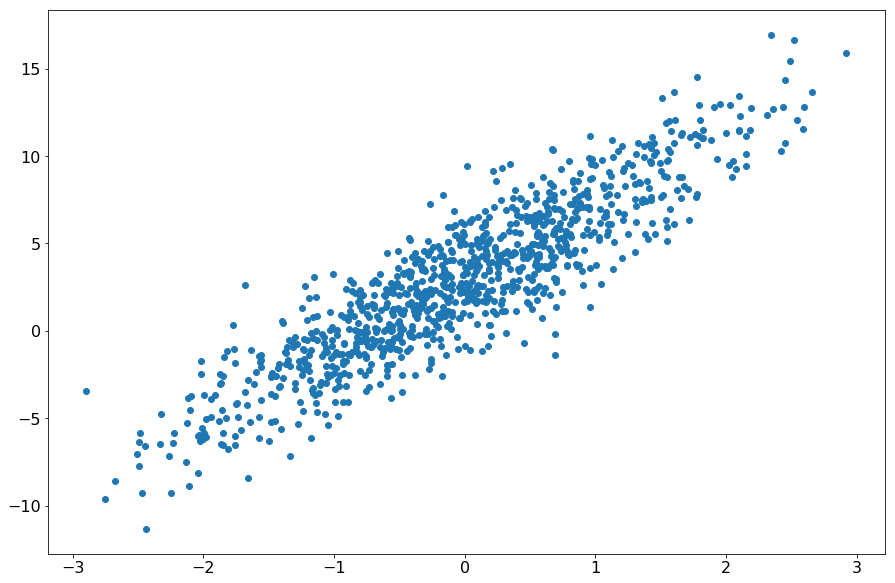

In [6]:
plt.scatter(X, Y)

Fit w/ ADVI
===

In [8]:
LR = LinearRegression()

In [9]:
LR.fit(X, Y, minibatch_size=100)

Average Loss = 225.32:  14%|█▍        | 27893/200000 [00:37<03:52, 741.04it/s]
Convergence archived at 27900
Interrupted at 27,899 [13%]: Average Loss = 527.34


LinearRegression()

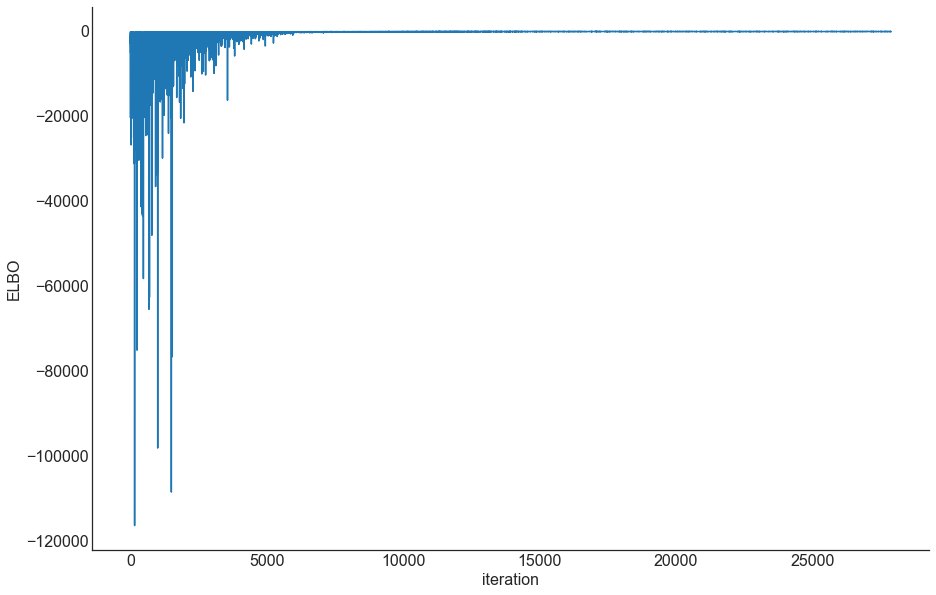

In [10]:
LR.plot_elbo()

In [11]:
Y_predict = LR.predict(X)

100%|██████████| 2000/2000 [00:01<00:00, 1301.64it/s]


In [12]:
LR.score(X, Y)

100%|██████████| 2000/2000 [00:01<00:00, 1586.55it/s]


0.80784468821176891

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dc27278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1101c19e8>]], dtype=object)

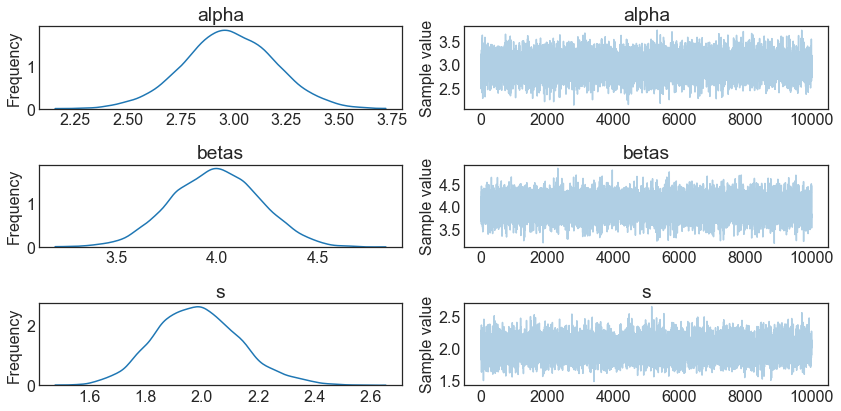

In [13]:
traceplot(LR.trace)

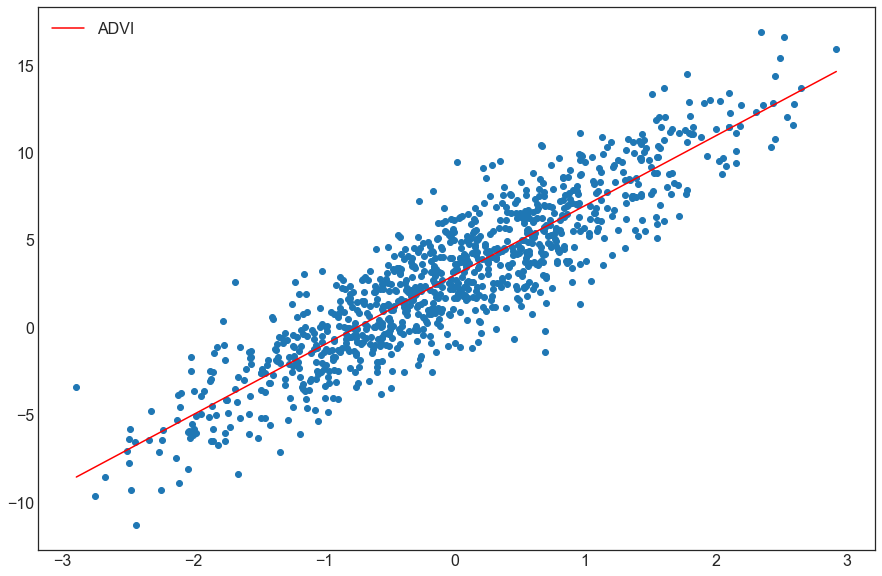

In [19]:
max_x = max(X)
min_x = min(X)

m = LR.summary['mean']['betas__0']
b = LR.summary['mean']['alpha__0']
fig1 = plt.figure()
#ax = fig.add_subplot(111)
plt.scatter(X, Y)
plt.plot([min_x, max_x], [m*min_x + b, m*max_x + b], 'r', label='ADVI')
plt.legend()

Fit w/ NUTS
===

In [15]:
LR2 = LinearRegression()

In [16]:
LR2.fit(X, Y, inference_type='nuts', inference_args={'draws': 2000})

setting shared vars


100%|██████████| 2500/2500 [00:03<00:00, 715.82it/s]


LinearRegression()

In [17]:
LR2.score(X, Y)

100%|██████████| 2000/2000 [00:02<00:00, 931.91it/s]


0.80865193012985903

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e3aae10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10dcf5a20>]], dtype=object)

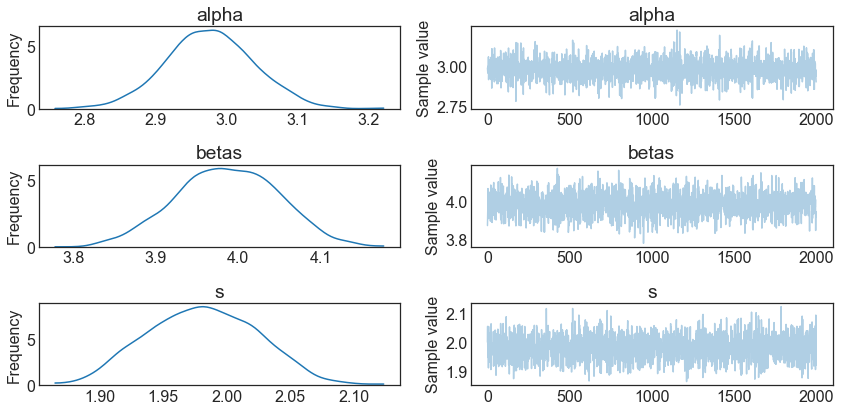

In [18]:
traceplot(LR2.trace)

Compare the two methods
===

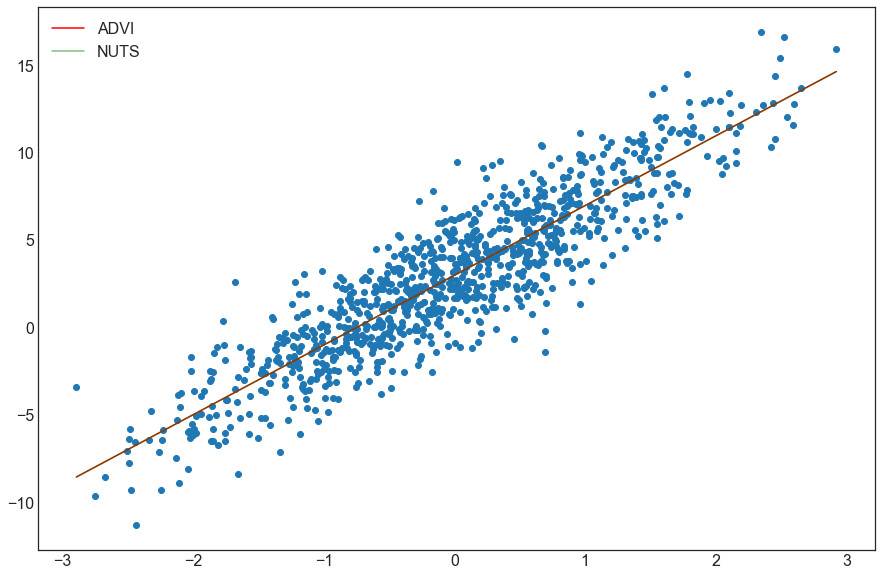

In [23]:
max_x = max(X)
min_x = min(X)

m = LR.summary['mean']['betas__0']
b = LR.summary['mean']['alpha__0']

m2 = LR2.summary['mean']['betas__0']
b2 = LR2.summary['mean']['alpha__0']
fig1 = plt.figure()
plt.scatter(X, Y)
plt.plot([min_x, max_x], [m*min_x + b, m*max_x + b], 'r', label='ADVI')
plt.plot([min_x, max_x], [m2*min_x + b2, m2*max_x + b2], 'g', label='NUTS', alpha=0.5)
plt.legend()